# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [18]:
df = pd.read_csv('/Users/wiltonngo/Apartment Rentals/ Data/Prepared Data/app2.csv')

# Data Cleaning

In [19]:
df.head()

,Unnamed: 0,State,Service Charge,Heating Type,Telekom-Tv Offer,Newly Construction,Balcony,Picture_count,Price_Trend,Telekom Upload Speed,...,Base Rent,Living Space,Pets Allowed,Lift,Type Of Flat,Rooms,Floor,Garden,date,Cost_Of_living
0,0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,...,595.00,86.00,NaN,False,ground_floor,4.0,1.0,True,May19,Median
1,2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,...,965.00,83.80,NaN,True,apartment,3.0,3.0,False,Oct19,Expensive
2,4,Bremen,138.0,self_contained_central_heating,NaN,False,True,19,2.46,NaN,...,765.00,84.97,NaN,False,apartment,3.0,1.0,False,Feb20,Expensive
3,6,Sachsen,70.0,self_contained_central_heating,ONE_YEAR_FREE,False,False,9,1.01,2.4,...,310.00,62.00,NaN,False,NaN,2.0,1.0,True,Feb20,Cheapest
4,7,Bremen,88.0,central_heating,ONE_YEAR_FREE,False,True,5,1.89,2.4,...,452.25,60.30,NaN,False,ground_floor,3.0,NaN,False,Feb20,Cheapest


In [20]:
# Drop uncessary columns
df.drop(columns=['Unnamed: 0'],inplace=True)

In [21]:
df.shape

(228315, 24)

In [22]:
# Check for missing values
df.isnull().sum()

State                       0
Service Charge           4088
Heating Type            36820
Telekom-Tv Offer        27427
Newly Construction          0
Balcony                     0
Picture_count               0
Price_Trend              1609
Telekom Upload Speed    28048
Total Rent                  0
Year Constructed        49277
Scout ID                    0
Kitchen                     0
Cellar                      0
Base Rent                   0
Living Space                0
Pets Allowed            95348
Lift                        0
Type Of Flat            30552
Rooms                       0
Floor                   40361
Garden                      0
date                        0
Cost_Of_living              0
dtype: int64

In [23]:
# There is alot of missing values, So I decided to leave the values alone and not skew the data

/Users/wiltonngo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Rent', ylabel='Density'>

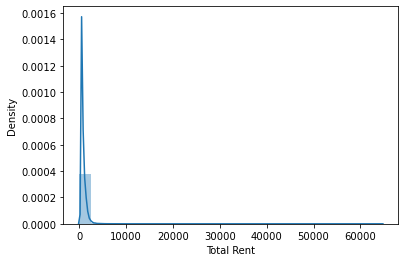

In [24]:
# Check for extreme values
sns.distplot(df['Total Rent'],bins = 25, kde = True)

In [25]:
# Check Median
df['Total Rent'].median()

650.0

In [26]:
# Check Mean
df['Total Rent'].mean()

814.9408274095072

In [27]:
# Check max
df['Total Rent'].max()

64651.0

In [28]:
# Check min
df['Total Rent'].min()

0.0

In [29]:
df.describe()

,Service Charge,Picture_count,Price_Trend,Telekom Upload Speed,Total Rent,Year Constructed,Scout ID,Base Rent,Living Space,Rooms,Floor
count,224227.000000,228315.000000,226706.000000,200267.000000,228315.000000,179038.000000,2.283150e+05,228315.000000,228315.000000,228315.000000,187954.000000
mean,151.423988,9.868480,3.394350,28.927989,814.940827,1965.700633,1.068851e+08,644.046138,73.682453,2.612384,2.131878
std,326.331778,6.441038,2.002074,16.302592,610.987831,47.852736,1.251104e+07,507.167425,273.771167,0.984269,3.554085
min,0.000000,0.000000,-12.330000,1.000000,0.000000,1000.000000,2.887174e+07,0.000000,0.000000,1.000000,-1.000000
25%,95.495000,6.000000,1.960000,10.000000,469.800000,1940.000000,1.066224e+08,335.000000,54.000000,2.000000,1.000000
50%,136.000000,9.000000,3.390000,40.000000,650.000000,1972.000000,1.111396e+08,490.000000,67.000000,3.000000,2.000000
75%,190.000000,13.000000,4.600000,40.000000,985.000000,1996.000000,1.137651e+08,795.000000,86.000000,3.000000,3.000000
max,146118.000000,112.000000,14.920000,100.000000,64651.000000,2090.000000,1.157117e+08,30990.000000,111111.000000,25.000000,999.000000


# Data Prep for Regression Analysis

### Hypothesis: If there is more living space the Rent will increase.

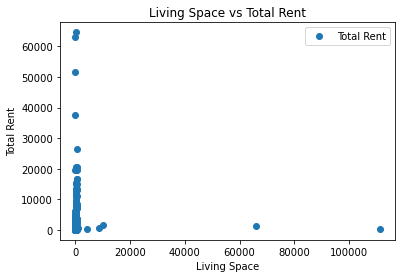

In [31]:
df.plot(x = 'Living Space', y='Total Rent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Living Space vs Total Rent')  
plt.xlabel('Living Space')  
plt.ylabel('Total Rent')  
plt.show()

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Living Space'].values.reshape(-1,1)
y = df['Total Rent'].values.reshape(-1,1)

In [33]:
X

array([[ 86.  ],
       [ 83.8 ],
       [ 84.97],
       ...,
       [115.  ],
       [ 95.  ],
       [ 70.  ]])

In [34]:
y

array([[ 840.],
       [1300.],
       [ 903.],
       ...,
       [1150.],
       [ 930.],
       [1015.]])

In [35]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# Regression Analysis

In [36]:
# Create regression object
regression = LinearRegression()

In [37]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)


LinearRegression()

In [38]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

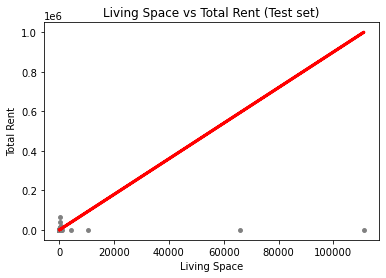

In [39]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Living Space vs Total Rent (Test set)')
plot_test.xlabel('Living Space')
plot_test.ylabel('Total Rent')
plot_test.show()

### The line fit the data very well. This can see by the line connects most of the data. There is a linear relationship bewteen the two variables

In [40]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [41]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.0087065]]
Mean squared error:  20157651.754622985
R2 score:  -50.41410880859346


In [42]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,829.98,1099.118856
1,1238.00,744.175820
2,494.79,579.136317
3,540.00,277.524824
4,1967.28,957.772251
5,245.00,455.897212
6,470.00,681.114875
7,405.00,681.114875
8,410.00,699.132288
9,800.00,987.410896


### The summary of the model comfirm that the model is inaccurate. Which can seen by the actual and predicted values. An R2 of -50.41 indicateds a very poor fit and the large MSE comfirms this. The slope of 9 shows that as living space increase the Total Rent Increases

In [43]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [44]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.0087065]]
Mean squared error:  247082.5096115781
R2 score:  0.32355125143146557


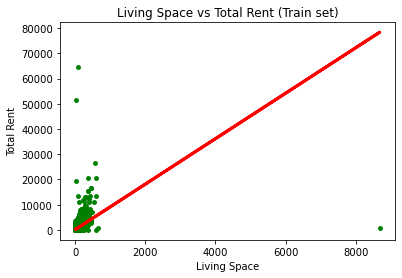

In [47]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Living Space vs Total Rent (Train set)')
plot_test.xlabel('Living Space')
plot_test.ylabel('Total Rent')
plot_test.show()

### The Model outcome of the Training Set is very different on the test set. WIth the MSE being smaller on the train set. Comfirming that it is good model to use since the slope is 9 for both sets saying that the Living Space will increases so as the toal rent

In [49]:
# Hypothesis 2: Having more Rooms in your House will increase the Total Rent

,State,Service Charge,Heating Type,Telekom-Tv Offer,Newly Construction,Balcony,Picture_count,Price_Trend,Telekom Upload Speed,Total Rent,...,Base Rent,Living Space,Pets Allowed,Lift,Type Of Flat,Rooms,Floor,Garden,date,Cost_Of_living
43964,Brandenburg,146.00,central_heating,ONE_YEAR_FREE,False,False,8,4.33,2.4,650.0,...,504.0,8684.0,NaN,False,NaN,3.0,4.0,True,Oct19,Median
128737,Bayern,115.00,central_heating,ONE_YEAR_FREE,False,False,23,6.09,40.0,1400.0,...,1200.0,66100.0,negotiable,False,roof_storey,2.0,2.0,True,May19,Expensive
146725,Sachsen,60.00,central_heating,ONE_YEAR_FREE,False,False,5,1.24,2.4,260.0,...,200.0,4340.0,negotiable,False,apartment,2.0,1.0,False,May19,Cheapest
149259,Sachsen_Anhalt,NaN,NaN,NaN,False,False,0,4.61,NaN,369.0,...,679.0,111111.0,NaN,False,apartment,3.0,NaN,False,Oct19,Cheapest
189743,Hessen,128.25,district_heating,ONE_YEAR_FREE,False,True,11,6.17,2.4,1641.5,...,1385.0,10259.0,yes,True,apartment,3.0,1.0,True,May19,Expensive


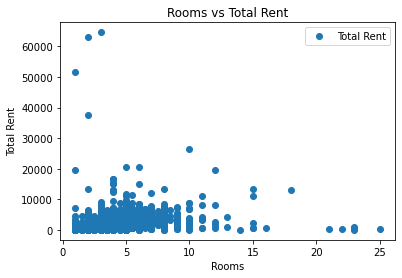

In [50]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Rooms', y='Total Rent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Rooms vs Total Rent')  
plt.xlabel('Rooms')  
plt.ylabel('Total Rent')  
plt.show()

In [65]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Rooms'].values.reshape(-1,1)
y = df['Total Rent'].values.reshape(-1,1)

In [66]:
X

array([[4. ],
       [3. ],
       [3. ],
       ...,
       [3.5],
       [4. ],
       [2. ]])

In [67]:
y

array([[ 840.],
       [1300.],
       [ 903.],
       ...,
       [1150.],
       [ 930.],
       [1015.]])

In [68]:
# Split data into a training set and a test set.  Using test_train_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =0)

# Regression Analysis

In [69]:
regression.fit(X_train, y_train)

LinearRegression()

In [70]:
y_predicted = regression.predict(X_test)

In [57]:
# Check summary stats
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.0087065]]
Mean squared error:  20157651.754622985
R2 score:  -50.41410880859346


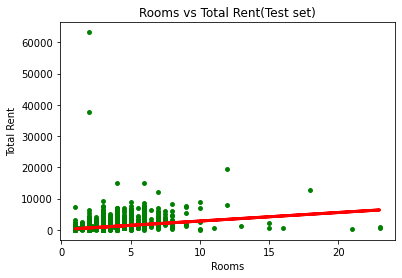

In [71]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rooms vs Total Rent(Test set)')
plot_test.xlabel('Rooms')
plot_test.ylabel('Total Rent')
plot_test.show()

In [72]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [73]:
# Check summary stats
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[273.07657163]]
Mean squared error:  323352.5077078358
R2 score:  0.175257057855985


In [74]:
# Create a dataframe comparing the actual and predicted values of y.

data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,829.98,1099.118856
1,1238.00,744.175820
2,494.79,579.136317
3,540.00,277.524824
4,1967.28,957.772251
5,245.00,455.897212
6,470.00,681.114875
7,405.00,681.114875
8,410.00,699.132288
9,800.00,987.410896


### The slope is 273 as rooms increase the total rent increase. The MSE is having a large value saying that the data is not very accurate. While R2 is .17 which is a very poor fit. But there is a postive relationship bewteen the two variables. But since the MSE and R2  it not very accurate model
